# Read a Collection and Explore Data
This example opens a dataset from the catalog, subsets it, and visualizes a variable.

Opening dataset…
<xarray.Dataset> Size: 16TB
Dimensions:           (time: 39, latitude: 158202, longitude: 158129)
Coordinates:
  * time              (time) datetime64[ns] 312B 1985-01-01 ... 2023-01-01
  * latitude          (latitude) float64 1MB 5.631e+06 5.631e+06 ... 8.854e+05
  * longitude         (longitude) float64 1MB 2.032e+06 2.032e+06 ... 6.776e+06
    spatial_ref       int64 8B ...
Data variables:
    efda_agent        (time, latitude, longitude) float64 8TB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    efda_disturbance  (time, latitude, longitude) float64 8TB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes:
    _FillValue:          0
    contact:             Alba Viana-Soto & Cornelius Senf
    creation_date:       2025-12-15 17:07
    crs:                 EPSG:3035
    description:         The European Forest Disturbance Atlas (EFDA) provide...
    doi:                 10.5281/zenodo.13333034
    institution:         Technical University of 

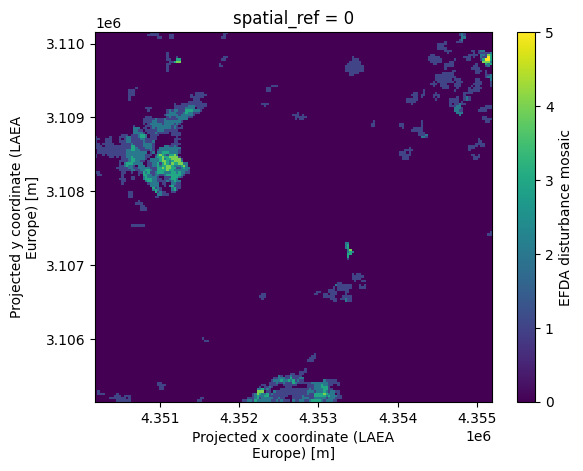

In [ ]:
from eoforeststac.providers.zarr import ZarrProvider
from eoforeststac.providers.subset import subset
import geopandas as gpd

provider = ZarrProvider(
    catalog_url="https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded-data/collections/public/catalog.json",
    endpoint_url="https://s3.gfz-potsdam.de",
    anon=True,
)

collection_id = "EFDA"
version = "2.1.1"

print("Opening dataset…")
ds = provider.open_dataset(collection_id=collection_id, version=version)
print(ds)

roi = gpd.read_file("geojson/DE-Hai.geojson")
geometry = roi.to_crs("EPSG:4326").geometry.union_all()

print("Subsetting to ROI…")
ds_sel = subset(
    ds,
    geometry=geometry,
    time=("1985-01-01", "2023-12-31"),
)

print(ds_sel)
ds_sel.efda_disturbance.sum(dim="time").plot()